# Проверка гипотез для сервиса аренды самокатов GoFast

В нашем распоряжении есть данные о некоторых пользователях из нескольких городов, а также об их поездках. Необходимо проанализировать данные и проверить некоторые гипотезы, которые могут помочь бизнесу вырасти.

# Описание проекта

Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:

<ul>
	<li> без подписки
		<ul>
			<li>абонентская плата отсутствует;</li>
			<li>стоимость одной минуты поездки — 8 рублей;</li>
			<li>стоимость старта (начала поездки) — 50 рублей;</li>
		</ul>
	</li>
	<li> с подпиской Ultra
		<ul>
			<li>абонентская плата — 199 рублей в месяц;</li>
			<li>стоимость одной минуты поездки — 6 рублей;</li>
            <li>стоимость старта — бесплатно.</li>
		</ul>
	</li>
</ul>
 

В основных данных есть информация о пользователях, их поездках и подписках.
<p> &nbsp; </p>

<div  style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 20px">
    
**Пользователи** — `users_go.csv`

`user_id` — уникальный идентификатор пользователя

`name` — имя пользователя

`age` — возраст

`city` — город

`subscription_type` — тип подписки (free, ultra)</div>
<p> &nbsp; </p>

<div style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 20px ">
    
**Поездки** — `rides_go.csv`

`user_id` — уникальный идентификатор пользователя

`distance` — расстояние, которое пользователь проехал в текущей сессии (в метрах)

`duration` — продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»

`date` — дата совершения поездки </div>
<p> &nbsp; </p>

<div  style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 20px ">
    
**Подписки** — `subscriptions_go.csv`

`subscription_type` — тип подписки (free, ultra)

`minute_price` — стоимость одной минуты поездки по данной подписке

`start_ride_price` — стоимость начала поездки

`subscription_fee` — стоимость ежемесячного платежа </div>
<p> &nbsp; </p>

Продакт-менеджеры сервиса хотят увеличить количество пользователей с подпиской. Для этого они будут проводить различные акции, но сначала нужно выяснить несколько важных моментов:

* Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании.
* Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?
* Проверить гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.
* Какой тест понадобился бы для проверки гипотезы о том, что количество обращений в техподдержку значимо снизилось после обновления сервера?

До начала исследования импортируем необходимые для вышеуказанных задач библиотеки:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
import seaborn as sb

### Загрузка данных

Загрузим данные о **Пользователях** — `users_go.csv`

In [2]:
users = pd.read_csv('/datasets/users_go.csv') #читаем csv-файл и сохраняем в переменную users
users.head() #выведем первые 5 значений

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


Загрузим данные о **Поездках** — `rides_go.csv`


In [3]:
rides = pd.read_csv('/datasets/rides_go.csv') #читаем csv-файл и сохраняем в переменную rides
rides.head() #выведем первые 5 значений

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


Загрузим данные о **Подписках** — `subscriptions_go.csv`

In [4]:
sub = pd.read_csv('/datasets/subscriptions_go.csv') #читаем csv-файл и сохраняем в переменную sub
sub.head() #выведем первые 5 значений

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


**Итог:** Все три таблицы соответствуют вышеуказанным ранее схемам.

### Предобработка данных

Теперь мы можем ознакомиться с основной информацией датафреймов:

In [5]:
users.info()
rides.info()
sub.info()
#выводим основную информацию о датафреймах

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Col

Можем обратить внимание, что датафреймы не содержат пустых значений.
Так же данная информация нам дает понимание, что все столбцы, кроме одного, содержат соответствующий логике тип данных.
Преобразуем столбец `date` датафрейма `rides` в формат даты:

In [6]:
rides = pd.read_csv('/datasets/rides_go.csv', parse_dates=['date'], dayfirst=True)
#поворно загрузим данные, но в этот раз укажем, чтобы столбец date сразу считывался в формате даты 
rides.info() #проверяем, изменился ли тип

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


Проверим наличие явных дубликатов в каждом из датафреймов:

In [7]:
print('Количество дубликатов в датафрейме "Пользователи" -', users.duplicated().sum())
print('Количество дубликатов в датафрейме "Поездки" -', rides.duplicated().sum())
print('Количество дубликатов в датафрейме "Подписки" -', sub.duplicated().sum())
#выводим текстовые поля и сумму дубликатов

Количество дубликатов в датафрейме "Пользователи" - 31
Количество дубликатов в датафрейме "Поездки" - 0
Количество дубликатов в датафрейме "Подписки" - 0


Удалим явные дубликаты:

In [8]:
users = users.drop_duplicates().reset_index(drop=True)
print('Количество дубликатов в датафрейме "Пользователи" -', users.duplicated().sum())

Количество дубликатов в датафрейме "Пользователи" - 0


Создадим в датафрейме "Поездки" дополнительный столбец, обозначающий месяц совершения поездки:

In [9]:
rides['month'] = rides['date'].dt.month
#создаем новый столбец и переводим все даты в значения месяца в цифрах
for x, y in (1,'Январь'), (2,'Февраль'), (3,'Март'), (4,'Апрель'), (5,'Май'), (6,'Июнь'),\
            (7,'Июль'), (8,'Август'), (9,'Сентябрь'), (10,'Октябрь'), (11,'Ноябрь'), (12,'Декабрь'):
     #создаем цикл, который перебирет значения
    rides['month'] = rides['month'].replace(x, y) # и заменяет на текст'''
month = rides['month'].unique() #выводим уникальные значения для проверки
month.sort() #отсортируем 
month #и выведем

array(['Август', 'Апрель', 'Декабрь', 'Июль', 'Июнь', 'Май', 'Март',
       'Ноябрь', 'Октябрь', 'Сентябрь', 'Февраль', 'Январь'], dtype=object)

**Итог:** В ходе предобработки данных были обнаружены и удалены явные дубликаты в датафрейме Пользователи, а в Поездках был проебразован тип данных для столбца, в котором хранилась дата совершения поездки.

Для дальнейших расчетов был добавлен дополнительный столбец, обозначающий месяц совершения поездки.

### Исследовательский анализ данных

Опишем и визуализируем общую информацию о пользователях и поездках:

#### Частота встречаемости городов 

,Город,Количество пользователей,Доля
0,Пятигорск,219,14.28
1,Екатеринбург,204,13.30
2,Ростов-на-Дону,198,12.91
3,Краснодар,193,12.58
4,Сочи,189,12.32
5,Омск,183,11.93
6,Тюмень,180,11.73
7,Москва,168,10.95


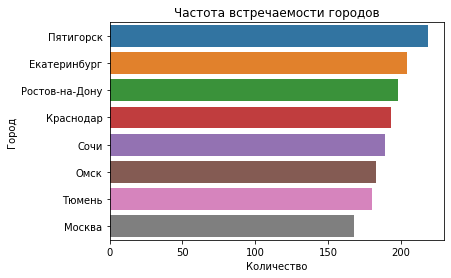

In [10]:
city_pivot = users.pivot_table(index=['city'], values='user_id', aggfunc = 'count')
city_pivot = city_pivot.rename_axis(None, axis=1).sort_values(by='user_id',ascending=False).reset_index()
hist = sb.barplot(data=city_pivot, x='user_id', y='city')
hist.set_title('Частота встречаемости городов') #присваиваем название
hist.set(xlabel='Количество', ylabel='Город') #присваиваем название осей
city_pivot.columns = ['Город', 'Количество пользователей']
city_pivot['Доля'] = round(city_pivot['Количество пользователей']/city_pivot['Количество пользователей'].sum()*100,2)
city_pivot

In [11]:
users['city'].describe() #выводим описательную статистику

count          1534
unique            8
top       Пятигорск
freq            219
Name: city, dtype: object

**Вывод:** На основе диаграммы и статистики можно сделать вывод, что все 8 городов распределены достаточно равномерно, но чаще всего встречается Пятигорск, а реже всего - Москва.

#### Соотношение пользователей с подпиской и без подписки

count     1534
unique       2
top       free
freq       835
Name: subscription_type, dtype: object

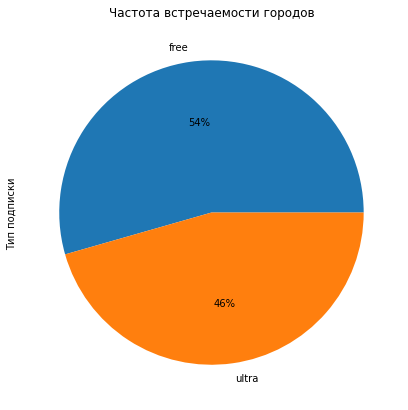

In [12]:
users['subscription_type'].value_counts().plot(kind ='pie', y ='city', grid=True, \
           figsize=(7, 7), autopct = '%1.0f%%', title='Частота встречаемости городов')
#строим гистограмму в виде пирога
plt.rcParams['font.size'] = 13.0
plt.ylabel('Тип подписки') #задаем название оси игрик и выводим 
users['subscription_type'].describe() #выводим описательную статистику

**Вывод:** На основе диаграммы и статистики можно сделать вывод, что самым распостраненным видом подписки является `free`, хотя доля ее пользователей не сильно превышает долю пользователей подписки `ultra`.

#### Возраст пользователей

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

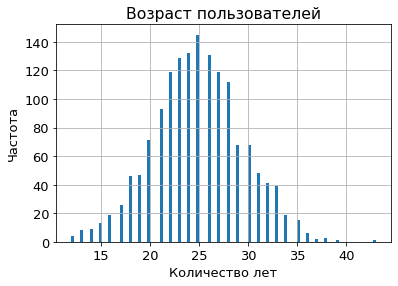

In [13]:
users.plot(kind='hist', y='age', bins=100, grid=True,\
           legend=False, title='Возраст пользователей') #строим гистограмму
plt.xlabel('Количество лет') #задаем название оси икс 
plt.ylabel('Частота') #задаем название оси игрик и выводим 
users['age'].describe() #выводим описательную статистику

**Вывод:** На основе гистограммы и статистики можно сделать вывод, что средний возраст пользователя сервиса составляет 25 лет,  и т.к. имеет нормальное распределение, основная доля пользователей находится в диапазоне от 20 до 30 лет.
Минимальное значение - 14 лет, а максимальное 43 года. На счет первого значения нужно обратить внимание, т.к. по правилам регистрация пользователей доступна только с 18 лет. 

#### Расстояние, которое пользователь преодолел за одну поездку

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

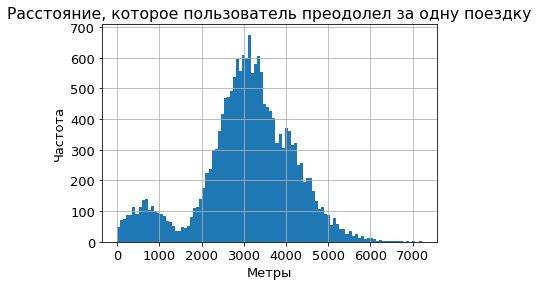

In [14]:
rides['distance'].plot(kind='hist', y ='distance', bins=100, grid=True, \
           legend=False, title='Расстояние, которое пользователь преодолел за одну поездку') #строим гистограмму
plt.xlabel('Метры') #задаем название оси икс 
plt.ylabel('Частота') #задаем название оси игрик и выводим 
rides['distance'].describe() #выводим описательную статистику

Text(0.5, 0, 'Расстояние, которое пользователь преодолел за одну поездку')

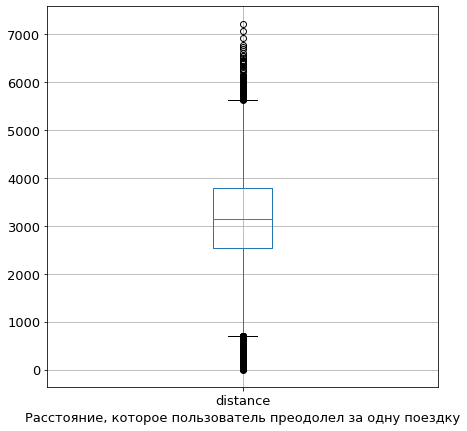

In [15]:
rides.boxplot(column=['distance'], figsize=(7,7), grid=True) #строим ящик с усами
plt.xlabel('Расстояние, которое пользователь преодолел за одну поездку') #задаем название оси икс и выводим

Видим, что основные значения находятся в диапазоне от 1600 метров и сделаем срез:

Text(0, 0.5, 'Частота')

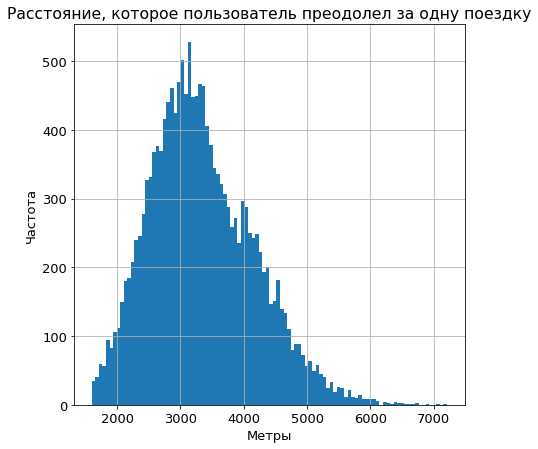

In [16]:
query = rides.query('distance >= 1600') #создаем переменную и делаем срез по вышеуказанным условиям
query.plot(kind='hist', y ='distance', bins=100, grid=True, \
           legend=False, figsize=(7, 7), title='Расстояние, которое пользователь преодолел за одну поездку')
#строим гистограмму с сеткой, без легенды и прописываем название 
plt.xlabel('Метры') #задаем название оси икс 
plt.ylabel('Частота') #задаем название оси игрик и выводим 

**Вывод:** На основе гистограммы можно сделать вывод, что есть небольшое отклонение от нормированного графика - это количество недалеких поездок (от 0 до 1,5 км), но в основном пользователи проезжают расстояние от 2,5 до 4 км на одну поездку.
Максимальная дальность поездки в датафрейме - 7 км, минимальная - 85 см.

#### Продолжительность поездок

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

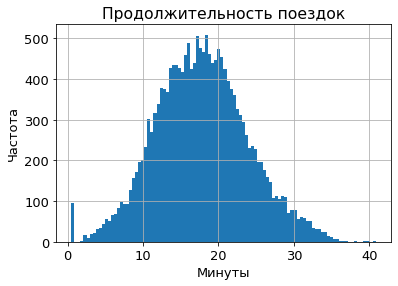

In [17]:
rides['duration'].plot(kind='hist', y ='duration', bins=100, grid=True, \
           legend=False, title='Продолжительность поездок') #строим гистограмму
plt.xlabel('Минуты') #задаем название оси икс 
plt.ylabel('Частота') #задаем название оси игрик и выводим 
rides['duration'].describe() #выводим описательную статистику

Text(0.5, 0, 'Продолжительность поездок')

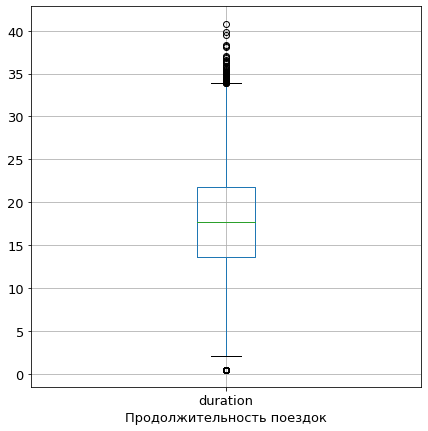

In [18]:
rides.boxplot(column=['duration'], figsize=(7,7), grid=True) #строим ящик с усами
plt.xlabel('Продолжительность поездок') #задаем название оси икс и выводим

Отсечем выбивающиеся минимальные значения и сделаем срез:

Text(0, 0.5, 'Частота')

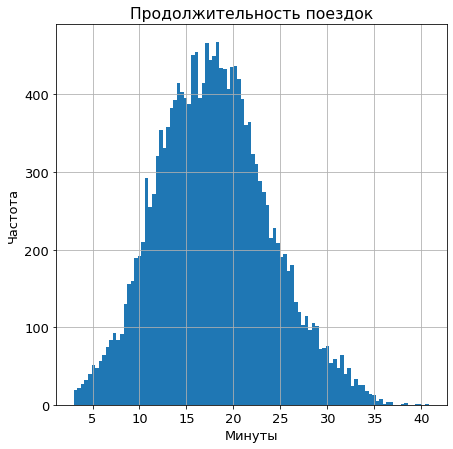

In [19]:
query = rides.query('duration > 3') #создаем переменную и делаем срез по вышеуказанным условиям
query.plot(kind='hist', y ='duration', bins=100, grid=True, \
           legend=False, figsize=(7, 7), title='Продолжительность поездок')
#строим гистограмму с сеткой, без легенды и прописываем название 
plt.xlabel('Минуты') #задаем название оси икс 
plt.ylabel('Частота') #задаем название оси игрик и выводим 

**Вывод:** На основе гистограммы можно сделать вывод, что есть достаточно весомый выброс в значениях около нуля. В остальном она имеет нормальное распределение и среднее время поездки занимает примерно от 10 до 25 минут. Максимальная длительность поездки - 41 минута, минимальная - 50 секунд. 

**Итог:**
* Все 8 городов, в которых находится сервис, распределены достаточно равномерно, но чаще всего встречается Пятигорск, а реже всего - Москва.
* Самым распостраненным видом подписки является `free`, хотя доля ее пользователей не сильно превышает долю пользователей подписки `ultra`.
* Средний возраст пользователя сервиса составляет 25 лет, и т.к. имеет нормальное распределение, основная доля пользователей находится в диапазоне от 20 до 30 лет. Минимальное значение - 14 лет, а максимальное 43 года. На счет первого значения нужно обратить внимание, т.к. по правилам регистрация пользователей доступна только с 18 лет.
* В данных о расстоянии есть небольшое отклонение от нормированного графика - это количество недалеких поездок (от 0 до 1,5 км), но в основном пользователи проезжают расстояние от 2,5 до 4 км на одну поездку. Максимальная дальность поездки в датафрейме - 7 км, минимальная - 85 см.
* В данных о длительности поездки есть достаточно весомый выброс в значениях около нуля. В остальном она имеет нормальное распределение и среднее время поездки занимает примерно от 10 до 25 минут. Максимальная длительность поездки - 41 минута, минимальная - 50 секунд.

Портрет типичного пользователя сервиса - это житель Пятигорска 25-лет, проезжающий около 3 км за одну поездку и потративший на это примерно 15-20 минут.

### Объединение данных

Объединим данные о пользователях, поездках и подписках в один датафрейм:

In [20]:
merger = users.merge(rides, on = 'user_id') #объеденим два датафрейма по колонке user_id
merger = merger.merge(sub, on = 'subscription_type') #добавим оставшийся по колонке subscription_type
merger.info() #выводим инфо для проверки соразмерности датафрейма
merger.head(20) #выводим на экран для проверки первые 20

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18068 entries, 0 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   name               18068 non-null  object        
 2   age                18068 non-null  int64         
 3   city               18068 non-null  object        
 4   subscription_type  18068 non-null  object        
 5   distance           18068 non-null  float64       
 6   duration           18068 non-null  float64       
 7   date               18068 non-null  datetime64[ns]
 8   month              18068 non-null  object        
 9   minute_price       18068 non-null  int64         
 10  start_ride_price   18068 non-null  int64         
 11  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(5), object(4)
memory usage: 1.8+ MB


,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,Январь,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,Январь,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,Апрель,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,Август,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,Август,6,0,199
5,1,Кира,22,Тюмень,ultra,2770.890808,16.650138,2021-10-09,Октябрь,6,0,199
6,1,Кира,22,Тюмень,ultra,3039.020292,14.927879,2021-10-19,Октябрь,6,0,199
7,1,Кира,22,Тюмень,ultra,2842.118050,23.117468,2021-11-06,Ноябрь,6,0,199
8,1,Кира,22,Тюмень,ultra,3412.690668,15.238072,2021-11-14,Ноябрь,6,0,199
9,1,Кира,22,Тюмень,ultra,748.690645,15.041884,2021-11-22,Ноябрь,6,0,199


Создадим ещё два:
* c данными о пользователях без подписки;
* с данными о пользователях с подпиской.

In [21]:
without_sub = merger[merger['subscription_type'] == 'free'] #без подписки
with_sub = merger[merger['subscription_type'] == 'ultra'] #с подпиской
print(without_sub.info()) 
with_sub.info()
#выведем инфо об обоих датафреймах

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11568 entries, 6500 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            11568 non-null  int64         
 1   name               11568 non-null  object        
 2   age                11568 non-null  int64         
 3   city               11568 non-null  object        
 4   subscription_type  11568 non-null  object        
 5   distance           11568 non-null  float64       
 6   duration           11568 non-null  float64       
 7   date               11568 non-null  datetime64[ns]
 8   month              11568 non-null  object        
 9   minute_price       11568 non-null  int64         
 10  start_ride_price   11568 non-null  int64         
 11  subscription_fee   11568 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(5), object(4)
memory usage: 1.1+ MB
None
<class 'pandas.core.frame.DataFr

Суммарно строки датафрема составляют размерность датафрейма `merge` - 18 068 строк, значит разделение прошло успешно.

 Визуализируем информацию о расстоянии и времени поездок для пользователей обеих категорий:

count    11568.000000
mean        17.390909
std          6.326803
min          0.500000
25%         12.958437
50%         17.326890
75%         21.594071
max         34.948498
Name: duration, dtype: float64

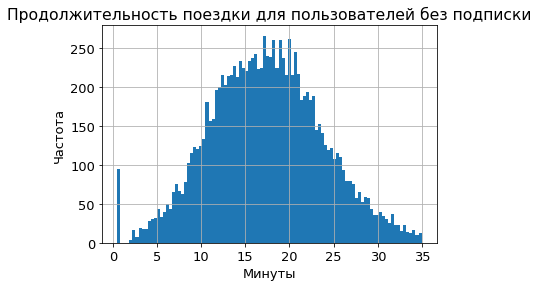

In [22]:
without_sub.plot(kind='hist', y='duration', bins=100, grid=True,\
           legend=False, title='Продолжительность поездки для пользователей без подписки') #строим гистограмму
plt.xlabel('Минуты') #задаем название оси икс 
plt.ylabel('Частота') #задаем название оси игрик и выводим 
without_sub['duration'].describe() #выводим описательную статистику 

count    11568.000000
mean      3045.495282
std       1246.173806
min          0.855683
25%       2366.562689
50%       3114.648465
75%       3905.697894
max       7211.007745
Name: distance, dtype: float64

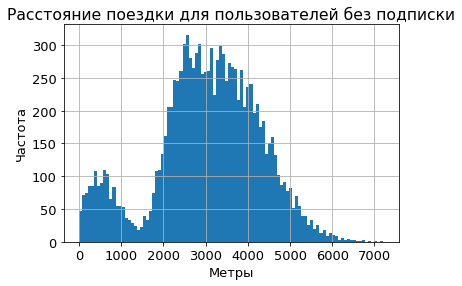

In [23]:
without_sub.plot(kind='hist', y='distance', bins=100, grid=True,\
           legend=False, title='Расстояние поездки для пользователей без подписки') #строим гистограмму
plt.xlabel('Метры') #задаем название оси икс 
plt.ylabel('Частота') #задаем название оси игрик и выводим 
without_sub['distance'].describe() #выводим описательную статистику 

**Вывод:** Есть большой выброс в 50 секундных поездках, вероятно это отмененные поездки. Причины могут быть разнообразными - рядом оказался более дешевый самокат, более заряженный, самокат оказался сломан и не поехал, или поездка вовсе отменилась. Без этого в среднем длительность поездки пользователя без подписки длится 10-25 минут. Что касаемо расстояния - в среднем пользователи без подписки  проезжают около 2-4,5 км, но так же есть небольшая совокупность коротких поездок (от 0 до 1,5 км).

count    6500.000000
mean       18.541985
std         5.572048
min         3.760353
25%        14.524654
50%        18.178153
75%        21.884129
max        40.823963
Name: duration, dtype: float64

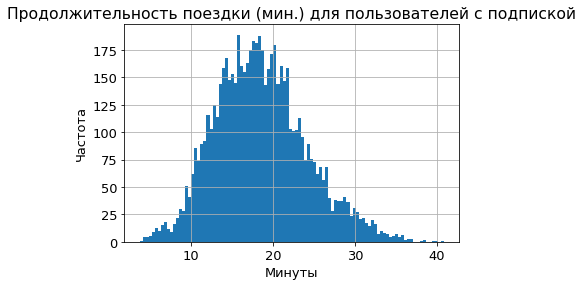

In [24]:
with_sub.plot(kind='hist', y='duration', bins=100, grid=True,\
           legend=False, title='Продолжительность поездки (мин.) для пользователей с подпиской') #строим гистограмму
plt.xlabel('Минуты') #задаем название оси икс
plt.ylabel('Частота') #задаем название оси игрик и выводим 
with_sub['duration'].describe() #выводим описательную статистику

count    6500.000000
mean     3115.445388
std       836.895330
min       244.210438
25%      2785.444017
50%      3148.637229
75%      3560.574425
max      5699.769662
Name: distance, dtype: float64

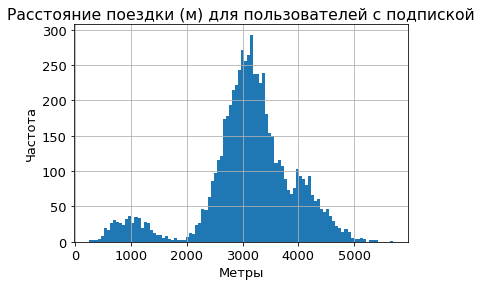

In [25]:
with_sub.plot(kind='hist', y='distance', bins=100, grid=True,\
           legend=False, title='Расстояние поездки (м) для пользователей с подпиской') #строим гистограмму
plt.xlabel('Метры') #задаем название оси икс 
plt.ylabel('Частота') #задаем название оси игрик и выводим 
with_sub['distance'].describe() #выводим описательную статистику 

**Вывод:** В среднем длительность поездки пользователя с подпиской длится 10-25 минут. Что касаемо расстояния - в среднем пользователи с подпиской проезжают около 2,5-4,0 км, но так же есть небольшая совокупность коротких поездок (от 0 до 1,5 км).

**Итог:** В целом распределение пользователей с разными подписками отличаются несущественно, в основном количеством непродолжительных поездок.

### Подсчёт выручки

Создадим датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными (`merger`) и найдем суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц:

In [26]:
merger['duration'] = np.ceil(merger['duration']).astype(int) 
#округлим значения до агреграции в большую сторону и переведем в тип целого числа
agg_df = merger.pivot_table(index=['user_id', 'subscription_type', 'month', 'minute_price',\
                            'start_ride_price','subscription_fee'], values=['duration', 'distance'],\
                            aggfunc= ['count','sum']) #создаем сводную таблицу
agg_df = agg_df.droplevel(1, axis=1).rename_axis(None, axis=1).reset_index() #убираем мультииндексы
agg_df.columns=['user_id', 'subscription_type', 'month', 'minute_price',
                'start_ride_price', 'subscription_fee','count', 'count2',\
                'sum_distance', 'sum_duration'] #переименуем столбцы        
agg_df.drop('count2', axis=1, inplace=True) #удалим один повторяющийся
agg_df['sum_distance'] = round(agg_df['sum_distance'],2) 
#округлим расстояние до 2 цифр после запятой
agg_df #выведем датафрейм для проверки

,user_id,subscription_type,month,minute_price,start_ride_price,subscription_fee,count,sum_distance,sum_duration
0,1,ultra,Август,6,0,199,2,6723.47,46
1,1,ultra,Апрель,6,0,199,1,754.16,7
2,1,ultra,Декабрь,6,0,199,2,6751.63,28
3,1,ultra,Ноябрь,6,0,199,3,7003.50,56
4,1,ultra,Октябрь,6,0,199,2,5809.91,32
...,...,...,...,...,...,...,...,...,...
11326,1534,free,Июнь,8,50,0,2,3409.47,26
11327,1534,free,Ноябрь,8,50,0,4,13350.02,78
11328,1534,free,Сентябрь,8,50,0,1,4928.17,23
11329,1534,free,Февраль,8,50,0,1,2103.91,14


Добавим столбец с помесячной выручкой, которую принёс каждый пользователь:

In [27]:
agg_df['month_revenue'] = (agg_df['minute_price'] * agg_df['sum_duration']) + \
(agg_df['count'] * agg_df['start_ride_price']) + agg_df['subscription_fee']
#умножаем построчно количество минут и стоимость минуты, количество поездок и стоимость старта и добавляем стоимость подписки
agg_df_rus = agg_df.copy() #создадим копию, чтобы был такой же датафрйем, но с понятными столбцами
agg_df_rus.columns=['Идентификатор пользователя', 'Тип подписки', 'Месяц', 'Стоимость одной минуты поездки',
                'Cтоимость начала поездки', 'Стоимость ежемесячного платежа','Количество поездок',\
                'Суммарное расстояние поездки', 'Суммарная продолжительность поездки', 'Месячная выручка']
#переименуем столбцы для наглядности
agg_df_rus.sort_values(by='Месячная выручка', ascending=False).head(10) #выведем для проверки топ 10 по сумме месячной выручки

,Идентификатор пользователя,Тип подписки,Месяц,Стоимость одной минуты поездки,Cтоимость начала поездки,Стоимость ежемесячного платежа,Количество поездок,Суммарное расстояние поездки,Суммарная продолжительность поездки,Месячная выручка
10799,1471,free,Январь,8,50,0,6,23098.19,143,1444
7620,1083,free,Май,8,50,0,7,23429.49,129,1382
4657,715,free,Декабрь,8,50,0,6,22712.45,131,1348
10412,1424,free,Апрель,8,50,0,7,21527.85,124,1342
10080,1383,free,Январь,8,50,0,6,20653.33,123,1284
8541,1196,free,Март,8,50,0,6,17991.78,121,1268
6421,938,free,Май,8,50,0,6,19061.40,111,1188
8155,1149,free,Декабрь,8,50,0,5,18449.38,116,1178
6867,991,free,Март,8,50,0,5,18244.39,113,1154
8974,1246,free,Сентябрь,8,50,0,6,17670.40,106,1148


In [28]:
agg_df_rus #вывод всей таблицы

,Идентификатор пользователя,Тип подписки,Месяц,Стоимость одной минуты поездки,Cтоимость начала поездки,Стоимость ежемесячного платежа,Количество поездок,Суммарное расстояние поездки,Суммарная продолжительность поездки,Месячная выручка
0,1,ultra,Август,6,0,199,2,6723.47,46,475
1,1,ultra,Апрель,6,0,199,1,754.16,7,241
2,1,ultra,Декабрь,6,0,199,2,6751.63,28,367
3,1,ultra,Ноябрь,6,0,199,3,7003.50,56,535
4,1,ultra,Октябрь,6,0,199,2,5809.91,32,391
...,...,...,...,...,...,...,...,...,...,...
11326,1534,free,Июнь,8,50,0,2,3409.47,26,308
11327,1534,free,Ноябрь,8,50,0,4,13350.02,78,824
11328,1534,free,Сентябрь,8,50,0,1,4928.17,23,234
11329,1534,free,Февраль,8,50,0,1,2103.91,14,162


**Итог:** На основе полученных данных рано делать какие-то выводы, однако можно обратить внимание, что самая большая помесячная выручка в основном получается от пользователей без подписки. 

### Проверка гипотез

Для увеличения количества пользователей с подпиской нужно выяснить несколько важных моментов:

#### Тратят ли пользователи с подпиской больше времени на поездки?

Есть специальный метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам: `scipy.stats.ttest_ind(array1, array2, equal_var, alternative).`

- $H_{0}$ гипотеза будет гласить, что пользователи с подпиской тратят столько же времени, сколько и без подписки
- $H_{1}$ гипотеза будет гласить, что пользователи с подпиской тратят больше времени на поездки

In [29]:
ultra = with_sub['duration'] #первая совокупность
free = without_sub['duration'] #вторая совокупность

alpha = 0.05 #уровень статистической значимости

results = st.ttest_ind(ultra, free, alternative = 'greater') #используем правостороннюю альтернативную гипотезу

print('P-value =', results.pvalue) #расчет p-value

if alpha > results.pvalue: #условие для проверки гипотезы
    print('Отвергаем нулевую гипотезу: Пользователи с подпиской тратят больше времени на поездки')
else:
    print ('Отвергаем альтернативную гипотезу')

P-value = 1.2804098316645618e-34
Отвергаем нулевую гипотезу: Пользователи с подпиской тратят больше времени на поездки


[Text(0.5, 0, 'Тип подписки'), Text(0, 0.5, 'Продолжительность поездок')]

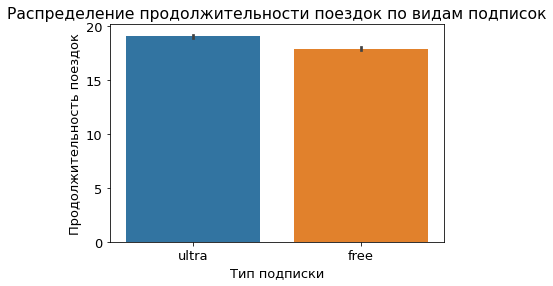

In [30]:
hist = sb.barplot(x = 'subscription_type', y = 'duration', data = merger)
#строим гистограмму
hist.set_title('Распределение продолжительности поездок по видам подписок') #присваиваем название
hist.set(xlabel='Тип подписки', ylabel='Продолжительность поездок') #присваиваем название осей

**Итог:** Гипотеза подтвердилась - пользователи с подпиской тратят больше времени на поездки.

#### Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? 

Есть специальный метод для проверки двустороенней гипотезы о равенстве среднего генеральной совокупности некоторому значению: `scipy.stats.ttest_1samp(a, popmean, alternative)`.

- $H_{0}$ гипотеза будет гласить, что пользователи с подпиской проезжают 3130 метров
- $H_{1}$ гипотеза будет гласить, что пользователи с подпиской проезжают больше 3130 метров

In [31]:
ultra_distance = with_sub['distance']  #единственная совокупность

value = 3130 #значение, с которым нужно сравнить

alpha = 0.05 #уровень статистической значимости

results = st.ttest_1samp(ultra_distance, value, alternative = 'greater') #используем левостороннюю альтернативную гипотезу

print('P-value =', results.pvalue) #расчет p-value

if alpha > results.pvalue: #условие для проверки гипотезы
    print('Отвергаем нулевую гипотезу: Пользователи с подпиской проезжают больше 3130 метров')
else:
    print ('Отвергаем альтернативную гипотезу')

P-value = 0.9195368847849785
Отвергаем альтернативную гипотезу


**Итог:** Гипотеза подтвердилась - пользователи с подпиской проезжают в среднем не больше 3130 метров.

#### Будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки?

Повторно используем метод `scipy.stats.ttest_ind(array1, array2, equal_var, alternative).`

- $H_{0}$ гипотеза будет гласить, что пользователи с подпиской приносят столько же выручки в месяц, сколько и без подписки
- $H_{1}$ гипотеза будет гласить, что пользователи с подпиской приносят больше выручки в месяц, чем пользователи без подписки

In [32]:
ultra = agg_df.loc[agg_df['subscription_type'] == 'ultra','month_revenue'] #первая совокупность
free = agg_df.loc[agg_df['subscription_type'] == 'free','month_revenue'] #вторая совокупность

alpha = 0.05 #уровень статистической значимости

results = st.ttest_ind(ultra, free, alternative = 'greater') #используем левостороннюю альтернативную гипотезу

print('P-value =', results.pvalue) #расчет p-value

if alpha > results.pvalue: #условие для проверки гипотезы
    print('Отвергаем нулевую гипотезу: Пользователи с подпиской приносят больше выручки в месяц, чем пользователи без подписки')
else:
    print ('Отвергаем альтернативную гипотезу')

P-value = 1.8850394384715216e-31
Отвергаем нулевую гипотезу: Пользователи с подпиской приносят больше выручки в месяц, чем пользователи без подписки


In [33]:
ultra

0       475
1       241
2       367
3       535
4       391
       ... 
4528    355
4529    301
4530    319
4531    295
4532    385
Name: month_revenue, Length: 4533, dtype: int64

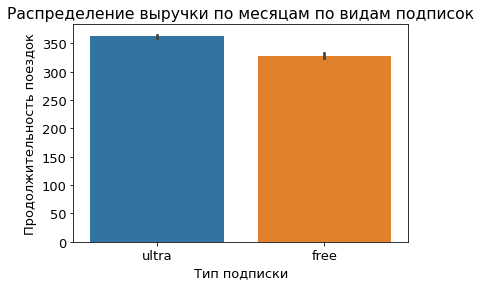

In [34]:
hist = sb.barplot(x = 'subscription_type',
            y = 'month_revenue',
            data = agg_df)
hist.set_title('Распределение выручки по месяцам по видам подписок')
hist.set(xlabel='Тип подписки', ylabel='Продолжительность поездок');

**Итог:** Гипотеза подтвердилась - пользователи с подпиской приносят больше выручки в месяц, чем пользователи без подписки, хотя ранее мы выясняли, что самые большие траты по месяцам у людей без подписки. 

####  Какой тест понадобился бы для проверки гипотезы о том, что количество обращений в техподдержку значимо снизилось после обновления сервера?

Если вы анализируете одну генеральную совокупность, с которой произошли некоторые изменения, как в случае, указанном в вопросе,
то это две зависимые (парные) выборки. Для них вы будете проверять, равны ли средние совокупности до и после этого изменения.
Это можно сделать с помощью метода `scipy.stats.ttest_rel`, аргументы в котором наборы данных — парные выборки до и после изменения.
Так же необходимо указать аргумент `alternative='greater'`, тогда проверится правосторонняя альтернативная гипотеза о том, что истинное среднее генеральной совокупности до изменения больше, чем истинное среднее генеральной совокупности после изменения.

**Итог:** На основе данных ответов, можно сделать вывод, что раз пользователи с подпиской тратят больше времени на поездки и приносят больше выручки в месяц, то идея маркетолого увеличить количество пользователей с подпиской увенчается успехом. Так же можно добавить акцию, которая поощрала бы проезд в 3130 м и менее для пользователей, что уменьшало бы износы самокатов.

### Распределения (необязательные)

#### Задача распределения № 2

Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. Известно, что уведомления открывают около 
40% получивших клиентов. Отдел планирует разослать 1 млн уведомлений. С помощью аппроксимации постройте примерный график распределения и оцените вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.

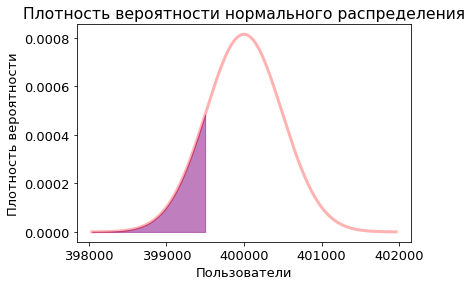

15 %


In [36]:
from math import sqrt
from scipy.stats import norm

n = 1000000
p = 0.4
# задаём параметры биномиального распределения

mu = n * p
sigma = sqrt(n * p * (1 - p))
# зададим параметры нормального распределения равными
# мат.ожиданию и дисперсии биномиального распределения

distr = st.norm(mu, sigma)
# задаём нормальное распределение

result = distr.cdf(399500)
# считаем вероятность

plt.figure() #строим фигуру 
x = np.linspace(mu - 4 * sigma, mu + 4 * sigma, 1000) 
#генерируем последовательности чисел в линейном пространстве с одинаковым размером шага
pdf = distr.pdf(x)

x_fill = np.linspace(mu - 4 * sigma, 399500, 1000) #меняем шаг на интересующий
pdf_fill = distr.pdf(x_fill)
plt.fill_between(x_fill, pdf_fill, color = 'purple', alpha = 0.5) #закрашиваем полученную область

plt.plot(x, pdf, 'r-', lw = 3, alpha = 0.3) #строим график
plt.xlabel('Пользователи') #задаем название оси икс
plt.ylabel ('Плотность вероятности') #задаем название оси игрек
plt.title ('Плотность вероятности нормального распределения') #задаем название графику
plt.show() #и выводим

print(round(result*100),'%') #умножаем на 100,округляем и выводим

**Вывод:** Вероятность 15% - на 399,5 тыс. пользователей можно рассчитывать.

# Общие выводы

Изначальная цель проекта - узнать, можно ли увеличить количество пользователей с подпиской и как это повлияет на сервис. 

Для этого мы загрузили и изучили данные из трех датафреймов, которые содержали в себе информацию о Пользователях, Поездках и Подписках.

В ходе предобработки данных были обнаружены и удалены явные дубликаты в датафрейме Пользователи, а в Поездках был проебразован тип данных для столбца, в котором хранилась дата совершения поездки.

Для дальнейших расчетов был добавлен дополнительный столбец, обозначающий месяц совершения поездки.

После исследовательского анализа данных, пришли к следующим выводам:
* Все 8 городов, в которых находится сервис, распределены достаточно равномерно, но чаще всего встречается Пятигорск, а реже всего - Москва.
* Самым распостраненным видом подписки является `free`, хотя доля ее пользователей не сильно превышает долю пользователей подписки `ultra`.
* Средний возраст пользователя сервиса составляет 25 лет, и т.к. имеет нормальное распределение, основная доля пользователей находится в диапазоне от 20 до 30 лет. Минимальное значение - 14 лет, а максимальное 43 года. На счет первого значения нужно обратить внимание, т.к. по правилам регистрация пользователей доступна только с 18 лет.
* В данных о расстоянии есть небольшое отклонение от нормированного графика - это количество недалеких поездок (от 0 до 1,5 км), но в основном пользователи проезжают расстояние от 2,5 до 4 км на одну поездку. Максимальная дальность поездки в датафрейме - 7 км, минимальная - 85 см.
* В данных о длительности поездки есть достаточно весомый выброс в значениях около нуля. В остальном она имеет нормальное распределение и среднее время поездки занимает примерно от 10 до 25 минут. Максимальная длительность поездки - 41 минута, минимальная - 50 секунд.

Далее, для более точного анализа, мы объеденили данные из 3-х датафреймов в один. И из него создали два отдельных под разные виды подписок и сравнили информацию о расстоянии и времени поездок для пользователей обеих категорий.
Выяснилось, что для пользователей без подписки характерен большой выброс в 50 секундных поездках, вероятно это отмененные поездки. Причины могут быть разнообразными - рядом оказался более дешевый самокат, более заряженный, самокат оказался сломан и не поехал, или поездка вовсе отменилась. Без этого в среднем длительность поездки пользователя без подписки длится 10-25 минут. Что касаемо расстояния - в среднем пользователи без подписки  проезжают около 2-4,5 км, но так же есть небольшая совокупность коротких поездок (от 0 до 1,5 км).

В среднем длительность поездки пользователя с подпиской длится 10-25 минут. Что касаемо расстояния - в среднем пользователи с подпиской проезжают около 2,5-4,0 км, но так же есть небольшая совокупность коротких поездок (от 0 до 1,5 км).

В целом распределение пользователей с разными подписками отличаются несущественно, в основном количеством непродолжительных поездок.

Затем мы вычислили и добавили столбец с помесячной выручкой, которую принёс каждый пользователь. На основе полученных данных не удалось сделать какие-то выводы, однако можно обратить внимание, что самая большая помесячная выручка в основном получается от пользователей без подписки.

Осталось только ответить на вопросы:

>Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании.

Гипотеза подтвердилась - пользователи с подпиской тратят больше времени на поездки.
>Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?

Гипотеза подтвердилась - пользователи с подпиской проезжают в среднем не больше 3130 метров.
>Проверить гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.

Гипотеза подтвердилась - пользователи с подпиской приносят больше выручки в месяц, чем пользователи без подписки, хотя ранее мы выясняли, что самые большие траты по месяцам у людей без подписки. 
>Какой тест понадобился бы для проверки гипотезы о том, что количество обращений в техподдержку значимо снизилось после обновления сервера?

Если вы анализируете одну генеральную совокупность, с которой произошли некоторые изменения, как в случае, указанном в вопросе,
то это две зависимые (парные) выборки. Для них вы будете проверять, равны ли средние совокупности до и после этого изменения.
Это можно сделать с помощью метода `scipy.stats.ttest_rel`, аргументы в котором наборы данных — парные выборки до и после изменения.
Так же необходимо указать аргумент `alternative='greater'`, тогда проверится правосторонняя альтернативная гипотеза о том, что истинное среднее генеральной совокупности до изменения больше, чем истинное среднее генеральной совокупности после изменения.

На основе данных ответов, можно сделать вывод, что раз пользователи с подпиской тратят больше времени на поездки и приносят больше выручки в месяц, то идея маркетолого увеличить количество пользователей с подпиской увенчается успехом. Так же можно добавить акцию, которая поощрала бы проезд в 3130 м и менее для пользователей, что уменьшало бы износы самокатов.